In [1]:
using Distributions
using LinearAlgebra
using Plots
default(label="", margin=10Plots.pt)

In [2]:
include("util.jl")

UT (generic function with 1 method)

In [6]:
function ambiguity(Σ,C, S_k)
    "E_q(z_t | u_t)[H[q(y_t | z_t)]]"
    return 0.5(log(2π) + log(Σ-C'*inv(S_k)*C) - 1)
end

ambiguity (generic function with 1 method)

In [117]:
# Nonlinear observation
# g(z) = sin([1.0, 0.0]'*z)
g(z) = sin(10*[1.,0.]'*z)/([1.,0.]'*z)

g (generic function with 1 method)

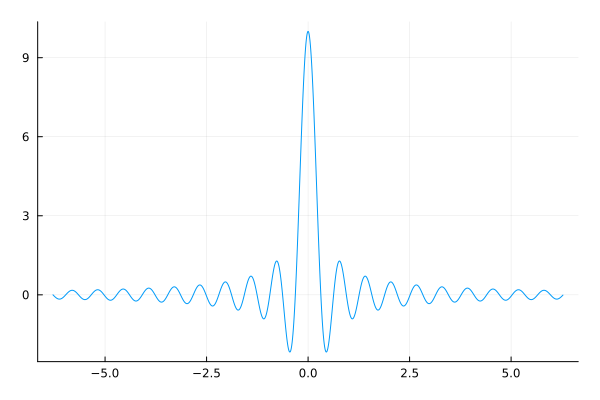

In [118]:
z_ = range(-2π, stop=2π, step=0.01)
plot(z_, x -> g([x, 0.0]))

In [119]:
# Current state
m_k = [0.1, 1.0]
S_k = diagm(ones(2));

In [120]:
# Measurement noise
R = 1e-6

1.0e-6

In [121]:
Wm, Wc = ut_weights(α=1e-3, β=1.0, κ=1e-2, N=2)

(Any[-995023.875623506, 248756.2189058765, 248756.2189058765, 248756.2189058765, 248756.2189058765], Any[-995021.875624506, 248756.2189058765, 248756.2189058765, 248756.2189058765, 248756.2189058765])

In [122]:
sp = sigma_points(m_k,S_k, α=1e-3, κ=1e-2)

2×5 Matrix{Any}:
 0.1  0.101418  0.1      0.0985823  0.1
 1.0  1.0       1.00142  1.0        0.998582

In [123]:
g(sp[:,1])

8.414709848078964

In [124]:
# Approximated state
μ_k, Σ_k, C_k = UT(m_k, S_k, g, Q=R, α=1e-1)

(-100.55444314947644, 24473.219652849824, [-24.61552922019922, 2.8421709430404007e-13])

In [125]:
ambiguity(Σ_k, C_k, S_k)

5.459070736415768

In [126]:
z_ = range(-2π, stop=2π, step=0.01)
A_ = zeros(length(z_))
for i in 1:length(z_)
    μ_k, Σ_k, C_k = UT([z_[i], 0.0], S_k, g, Q=R)
    A_[i] = ambiguity(Σ_k, C_k, S_k)
end

In [127]:
A_

1257-element Vector{Float64}:
 -0.6076860525863599
  0.15388081417346333
  1.0546986727599679
  1.5157016318655456
  1.8235791798442138
  2.051389505357074
  2.229018149060633
  2.3716220593194253
  2.4879225968316137
  2.583368529258658
  2.6615597445924495
  2.724965054019415
  2.7753148619610757
  ⋮
  2.7584642074293835
  2.703540238355161
  2.635001258951264
  2.550881707838996
  2.448359953458901
  2.3232733578923424
  2.169207848435484
  1.9756245486753747
  1.723473813496784
  1.3727252666847356
  0.8127871838213685
 -0.6066039172994546

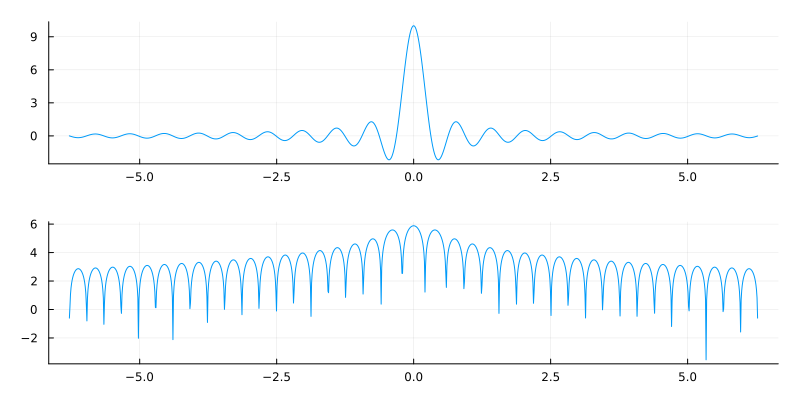

In [128]:
p1 = plot(z_, x -> g([x, 0.0]))
p2 = plot(z_, A_)
plot(p1,p2, layout=(2,1), size=(800,400))

In [139]:
# Goal prior
m_star = 1.0
S_star = 1.0;

In [140]:
function risk(m_pred, S_pred, m_star, S_star)
    return 0.5(log(det(S_star)/det(S_pred)) + 1 + (μ_k-m_star)'*inv(S_star)*(μ_k-m_star) + tr(inv(S_star)*S_pred))
end

risk (generic function with 1 method)

In [141]:
risk(1.0, 1.0, m_star, S_star)

1.2862019547553372